In [1]:
#lOADING THE VEGETABLE DATASET DATASET
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Price.csv",parse_dates=True, index_col='1/5/2021')
# Display the first few rows
print(data)

              Tomato Big(Nepali)  Kg        50        60        55
1/5/2021                                                          
1/5/2021      Tomato Big(Indian)  Kg        50        60        55
1/5/2021     Tomato Small(Local)  Kg        30        35      32.5
1/5/2021    Tomato Small(Tunnel)  Kg        30        35      32.5
1/5/2021    Tomato Small(Indian)  KG        40        45      42.5
1/5/2021     Tomato Small(Terai)  KG        40        45      42.5
...                          ...  ..       ...       ...       ...
2023-09-28  Tomato Small(Indian)  KG  Rs 45.00  Rs 55.00  Rs 50.00
2023-09-28   Tomato Small(Local)  KG  Rs 50.00  Rs 60.00  Rs 55.00
2023-09-28  Tomato Small(Tunnel)  KG  Rs 60.00  Rs 75.00  Rs 69.00
2023-09-28              Turnip A  KG  Rs 70.00  Rs 80.00  Rs 75.00
2023-09-28    Water Melon(Green)  KG  Rs 50.00  Rs 60.00  Rs 56.67

[96479 rows x 5 columns]


#  1.DATA PREPROCESSING 

In [2]:
#EXTRACTING THE TOMATO RECORDS FROM THE DATASET
data = data[data.iloc[:, 0] == "Tomato Big(Indian)"]

In [3]:
#DROOPING THE UNWANTED COLUMN
data.drop(["Tomato Big(Nepali)","Kg"], axis=1,inplace=True)

In [4]:
#RENAMING THE COLUMNS
data.rename_axis('Date',inplace=True);data.rename(columns={
    '50': 'MinPrice',
    '60': 'MaxPrice',
    '55': 'AvgPrice',
}, inplace=True)

In [5]:
#REPLACING THE WORDS/NUMBERS/SYMBOLS NOT NEEDED
for column in ['MinPrice', 'MaxPrice', 'AvgPrice']:
    data[column] = data[column].str.replace(r'Rs ', '', regex=True).str.replace(',', '', regex=True)

In [6]:
#CHANGING THE'DATE' COLUMN AS INDEX AND ITS TYPE AS DATE
data.index = pd.to_datetime(data.index,format='mixed')
#EXTRACTING DATA BETWEEN THE GIVEN DATES
data = data[(data.index > '2022-09-01') & (data.index <= '2023-08-30')]

In [7]:
#CHANGING THE DATAtYPE OF COLUMNS
data['MinPrice'] = data['MinPrice'].astype('float64')
data['MaxPrice'] = data['MaxPrice'].astype('float64')
data['AvgPrice'] = data['AvgPrice'].astype('float64')

# 2.UNIVARIATE AND BIVARIATE ANALYSIS

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 302 entries, 2022-09-02 to 2023-08-30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MinPrice  302 non-null    float64
 1   MaxPrice  302 non-null    float64
 2   AvgPrice  302 non-null    float64
dtypes: float64(3)
memory usage: 9.4 KB


In [10]:
data["MaxPrice"]

Date
2022-09-02     60.0
2022-09-03     55.0
2022-09-04     60.0
2022-09-05     60.0
2022-09-06     60.0
              ...  
2023-08-26    110.0
2023-08-27    100.0
2023-08-28     90.0
2023-08-29     80.0
2023-08-30     80.0
Name: MaxPrice, Length: 302, dtype: float64

In [11]:
#IMPORTING FUNCTION TO CHECK THE STASTISTICS OF THE DATASET
from Descriptive import Descriptive
obj=Descriptive()
#segregating the quantitrative and qualitative variables in the stock dataset
quan,qual=obj.segreQuanQual(data)
des_data=obj.descriptive_Analysis(data,quan)
des_data

The Quantitative Data: ['MinPrice', 'MaxPrice', 'AvgPrice']
The Qualtitative Data []


D:\Hope AI\Week12-Time Series Analysis\TS-Model\Assignment\Descriptive.py:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  des_data[i]["Null_count"]=dataset[i].isnull().sum()
D:\Hope AI\Week12-Time Series Analysis\TS-Model\Assignment\Descri

,MinPrice,MaxPrice,AvgPrice
Null_count,0,0,0
NonNull_count,302,302,302
Total_Count,302,302,302
Mean,53.188742,62.980132,58.649238
Median,50.0,60.0,55.0
Mode,50.0,60.0,55.0
Std,16.873404,17.479735,17.126613
Min,30.0,40.0,35.0
Max,150.0,160.0,155.0
Q1:25%,40.0,50.0,46.67


In [12]:
#probability distribution function which shows the area between given range
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    sample=dataset
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f,standard deviation=%.3f' % (sample_mean,sample_std))
    dist=norm(sample_mean,sample_std)
    values=[value for value in range(startrange,endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

C:\Users\Admin\AppData\Local\Temp\ipykernel_1476\404112669.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


Mean=58.649,standard deviation=17.127
The area between range(60,100):0.471661377727276


0.471661377727276

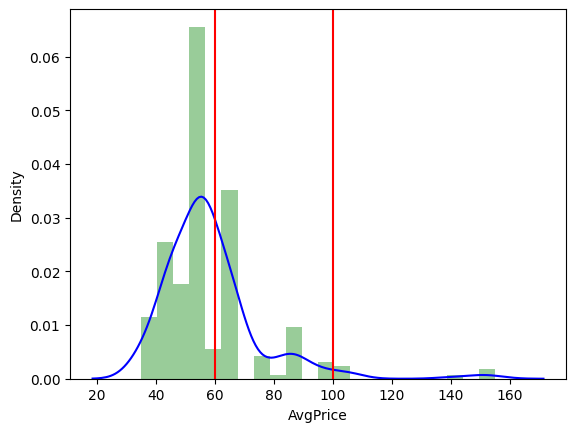

In [13]:
get_pdf_probability(data["AvgPrice"],60,100)

# 3. Stationarity Test

In [14]:
#TO CHECK FOR STATIONARITY ON THE TIMESERIES DATA
def adf_test_for_columns(df, columns):
    def adf_test(timeseries):
        from statsmodels.tsa.stattools import adfuller
        print('Results of Dickey-Fuller Test:')
        dftest = adfuller(timeseries, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
        for key, value in dftest[4].items():
            dfoutput['Critical Value (%s)' % key] = value
        print(dfoutput)
        print("Condition:")
        print("p-value<=0.05-->Accept Alternate Hypothesis")
        print("p-value>0.05-->Accept Null Hypothesis")
        if (dfoutput['Test Statistic'] < dfoutput["Critical Value (1%)"] or
            dfoutput['Test Statistic'] < dfoutput["Critical Value (5%)"] or
            dfoutput['Test Statistic'] < dfoutput["Critical Value (10%)"] and
            dfoutput["p-value"] < 0.05):
            print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
            print("Reject null hypothesis:Non Stationarity")
            print("Accept Alternate hypothesis:Stationarity ")
            print("Stationarity based on ADH")
        else:
            print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
            print("Accept null hypothesis:Non Stationarity")
            print("Reject Alternate hypothesis:Stationarity ")
            print("Non-stationarity based on ADH*******************Applying difference and testing for Stationarity************")
            timeseries = timeseries.diff().dropna()
            adf_test(timeseries)
        return timeseries

    statORnot = {}
    for column in columns:
        print(f"\nTesting column: {column}")
        statORnot[column] = adf_test(df[column])
    
    return statORnot


In [15]:
columns_to_test = ['MinPrice', 'MaxPrice', 'AvgPrice']
statORnot = adf_test_for_columns(data, columns_to_test)


# Print the results
for column, output in statORnot.items():
    print(f"Column: {column}, Result: {output}")
   


Testing column: MinPrice
Results of Dickey-Fuller Test:
Test Statistic                  -1.816887
p-value                          0.372111
#Lags Used                      16.000000
Number of Observations Used    285.000000
Critical Value (1%)             -3.453505
Critical Value (5%)             -2.871735
Critical Value (10%)            -2.572202
dtype: float64
Condition:
p-value<=0.05-->Accept Alternate Hypothesis
p-value>0.05-->Accept Null Hypothesis
Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis
Accept null hypothesis:Non Stationarity
Reject Alternate hypothesis:Stationarity 
Non-stationarity based on ADH*******************Applying difference and testing for Stationarity************
Results of Dickey-Fuller Test:
Test Statistic                  -4.389076
p-value                          0.000310
#Lags Used                      15.000000
Number of Observations Used    285.000000
Critical Value (1%)             -3.453505
Critical Value (5%)     

In [16]:
#DATASET AFTER APPLYING DIFFERENCIATION
tomato_df = pd.DataFrame(statORnot)

In [17]:
tomato_df

,MinPrice,MaxPrice,AvgPrice
Date,,,
2022-09-03,-5.0,-5.0,-5.83
2022-09-04,0.0,5.0,2.50
2022-09-05,5.0,0.0,2.50
2022-09-06,0.0,0.0,0.83
2022-09-07,0.0,0.0,0.00
...,...,...,...
2023-08-26,0.0,0.0,0.00
2023-08-27,-10.0,-10.0,-10.00
2023-08-28,-10.0,-10.0,-10.00


In [18]:
# Normalization using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(tomato_df)
print("Len:",data1.shape)

Len: (301, 3)


# 4.Model Creation and Evaluation

In [27]:
#creating a dataframe, a dictionary, a list to fit the model and evaluating the metrics given
ds=pd.DataFrame(data1,columns=[["MinPrice","MaxPrice","AvgPrice"]])
performance={"Model":[],"RMSE":[],"MaPe":[],"Order":[]}
list1=["MinPrice","MaxPrice","AvgPrice"]

In [31]:
# Function to fit and evaluate VARMAX model
def combination(ds,listt):
    print(listt)
    datasetTwo=ds[listt]
    training_size=round(len(datasetTwo) * 0.80)    
    X_train =datasetTwo[:training_size]
    y_test=datasetTwo[training_size:]
    from statsmodels.tsa.api import VARMAX
    best_aic = float('inf')
    best_order = None
    best_model = None
    orders=[(1,1),(1,2),(2,1),(2,2),(3,1),(3,2)]
    for i in orders:
        print(i)
        model = VARMAX(X_train,order=i, trend='c') # c indicates a constant trend
        results = model.fit(maxiter=5, disp=False)
        print('Order =', i)
        print('AIC: ', results.aic)
        print('BIC: ', results.bic)
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = i
            best_model=results
    for_steps=len(y_test)
    pred = best_model.get_forecast(for_steps).predicted_mean
    from sklearn.metrics import mean_squared_error
    rmse= round(mean_squared_error(y_test,pred,squared=False))
    from sklearn.metrics import mean_absolute_percentage_error
    mape=mean_absolute_percentage_error(y_test,pred)
    performance["Model"].append(listt)
    performance["RMSE"].append(rmse)
    performance["MaPe"].append(mape)
    performance["Order"].append(best_order)
    perf1=pd.DataFrame(performance)
    return perf1,best_model,pred,X_train,y_test
    #result.summary()

In [32]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
perf1,best_model,pred,X_train,y_test=combination(ds,list1)

['MinPrice', 'MaxPrice', 'AvgPrice']
(1, 1)
Order = (1, 1)
AIC:  -4500.14684274927
BIC:  -4406.057325545023
(1, 2)
Order = (1, 2)
AIC:  -4550.271148923122
BIC:  -4424.818459317459
(2, 1)
Order = (2, 1)
AIC:  -4519.431411117785
BIC:  -4393.978721512121
(2, 2)
Order = (2, 2)
AIC:  -4511.447630317436
BIC:  -4354.631768310356
(3, 1)
Order = (3, 1)
AIC:  -4522.871641803161
BIC:  -4366.055779796081
(3, 2)
Order = (3, 2)
AIC:  -4508.923709435231
BIC:  -4320.744675026735


# 5. Forecasting on the best model

In [39]:
# Forecasting for the next 60 steps
forecast=best_model.forecast(steps=60)

In [40]:
forecast

,MinPrice,MaxPrice,AvgPrice
241,0.264676,0.310563,0.291072
242,0.264580,0.310788,0.289450
243,0.266704,0.312630,0.290003
244,0.266044,0.311975,0.289918
245,0.266270,0.312247,0.289937
246,0.266190,0.312126,0.289929
247,0.266218,0.312182,0.289934
248,0.266208,0.312156,0.289931
249,0.266211,0.312168,0.289932
250,0.266210,0.312162,0.289932


In [47]:
# Inverse transform the forecast
forecast_ori = Ms.inverse_transform(forecast)
forecast_df = pd.DataFrame(forecast_ori, columns=['MinPrice', 'MaxPrice', 'AvgPrice'])

In [54]:
#Inversing from he differenciation applied
last_known_value = data.iloc[-1]
recovered_forecast =forecast_df.cumsum() + last_known_value

In [55]:
recovered_forecast

,MinPrice,MaxPrice,AvgPrice
0,69.701333,79.690072,75.116164
1,69.388389,79.416192,74.980865
2,69.394028,79.437050,74.931274
3,69.300558,79.353118,74.868626
4,69.241054,79.312636,74.808851
5,69.169480,79.252816,74.747879
6,69.102195,79.201877,74.687587
7,69.033422,79.146794,74.626898
8,68.965141,79.093664,74.566433
9,68.896711,79.039607,74.505846


In [78]:
# Inverse transform he actual test set data
y_test_ori=Ms.inverse_transform(y_test)
y_test_ori_df = pd.DataFrame(y_test_ori, columns=['MinPrice', 'MaxPrice', 'AvgPrice'])

In [80]:
#Inverse Differenciation
y_test_last_known_value = data.iloc[-1]
recovered_y_test =y_test_ori_df.cumsum() + last_known_value

In [81]:
recovered_y_test

,MinPrice,MaxPrice,AvgPrice
0,70.0,80.0,75.00
1,70.0,80.0,75.00
2,70.0,80.0,75.00
3,70.0,80.0,76.67
4,70.0,80.0,76.67
5,80.0,90.0,85.00
6,80.0,90.0,85.00
7,80.0,90.0,86.67
8,70.0,80.0,75.00
9,80.0,90.0,85.00


# 6. Plotting Actual vs Forecasted data

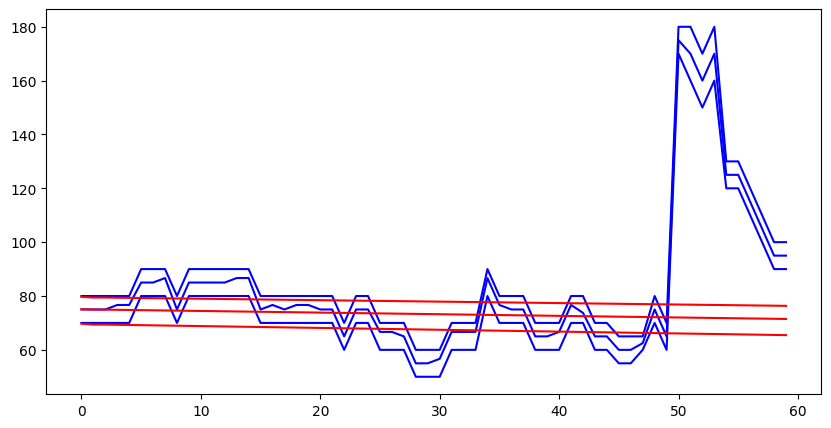

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(recovered_y_test, color = 'blue', label="Actual")
plt.plot(recovered_forecast, color = 'red', label ="Predicted")

In [84]:
# Inverse transform the predicted data
pred_ori=Ms.inverse_transform(pred)
pred_ori_df = pd.DataFrame(pred_ori, columns=['MinPrice', 'MaxPrice', 'AvgPrice'])

In [86]:
#inverse differenciation
pred_last_known_value = data.iloc[-1]
recovered_pred =pred_ori_df.cumsum() + last_known_value

In [90]:
recovered_pred

,MinPrice,MaxPrice,AvgPrice
0,69.701333,79.690072,75.116164
1,69.388389,79.416192,74.980865
2,69.394028,79.437050,74.931274
3,69.300558,79.353118,74.868626
4,69.241054,79.312636,74.808851
5,69.169480,79.252816,74.747879
6,69.102195,79.201877,74.687587
7,69.033422,79.146794,74.626898
8,68.965141,79.093664,74.566433
9,68.896711,79.039607,74.505846


# 7.Plotting the actual(y_test) and Predicted data for the next 60 days

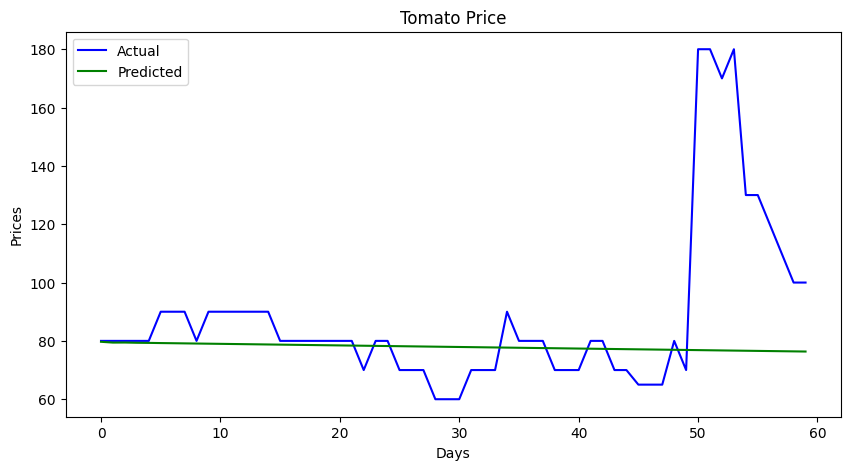

In [89]:
from stockFunctions import graph
graph(recovered_y_test["MaxPrice"],recovered_pred["MaxPrice"],"Actual","Predicted","Tomato Price","Days","Prices")